# Implementation of a convolutional neural network on the MNIST dataset via tensorflow

First we import the requried libraries

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Next we load the mnist data set, and print the 5th test sample with its label as a one-hot vector

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
one-hot vector [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


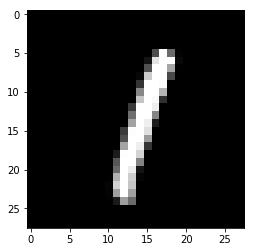

In [91]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('one-hot vector', mnist.test.labels[5])
plt.imshow(mnist.test.images[5].reshape((28, 28)), cmap="gray")
plt.show()

# Modeling of the CNN

Setting the placeholders, and for convenience sake we define a 2d convolution an a max poolong function.

In [92]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784], name="data")
y_ = tf.placeholder(tf.float32, shape=[None, 10], name="labels")
x_image = tf.reshape(x, [-1,28,28,1])
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

Define initialization as function (because we will need this for each layer...)

In [93]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

Modeling the first layer with 32 convolutional nodes, with filterdimension 5x5.

In [94]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

Activation layer + pooling layer

In [95]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

Setting up the second hidden convolutinal layer (of size 64).

In [96]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

Setting up a first fully connected layer of size 1024 with its activation layer.

In [97]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

Apply dropout in readout layer.

In [98]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Define readout layer

In [99]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Training

In [100]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(2500):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

step 0, training accuracy 0.08
step 100, training accuracy 0.84
step 200, training accuracy 0.82
step 300, training accuracy 0.92
step 400, training accuracy 0.92
step 500, training accuracy 0.9
step 600, training accuracy 0.94
step 700, training accuracy 0.98
step 800, training accuracy 0.98
step 900, training accuracy 0.94
step 1000, training accuracy 0.94
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 0.98
step 1600, training accuracy 1
step 1700, training accuracy 0.92
step 1800, training accuracy 0.94
step 1900, training accuracy 0.96
step 2000, training accuracy 0.96
step 2100, training accuracy 0.98
step 2200, training accuracy 0.98
step 2300, training accuracy 0.94
step 2400, training accuracy 1


# Testing

test accuracy 0.9796


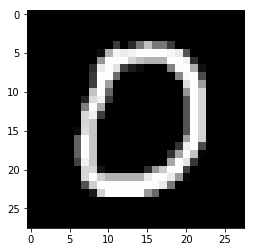

[[9.9990904e-01 1.3474050e-07 3.7892372e-05 6.6380062e-07 2.5134108e-08
  1.3210055e-06 2.9327346e-05 7.4540608e-08 9.8758173e-06 1.1581610e-05]]


In [101]:
print("test accuracy %g"%accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
plt.imshow(mnist.test.images[10].reshape((28, 28)), cmap="gray")
plt.show()
Z = y_conv.eval(feed_dict={x: mnist.test.images[10].reshape(1, 784), keep_prob: 1})
print(sess.run(tf.nn.softmax(Z)))
sess.close()

As we can see, we have a prediction of 99.99 % that the digit in this image is a 0 !